In [2]:
import geoopt
import torch
import numpy as np
import random
import logging
import json

In [17]:
weights = np.load("../models/hyperbolic/weights.npy")
song2ids = json.load(open("../models/hyperbolic/song2idx.json"))

In [18]:
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA
from geomstats.geometry.hyperboloid import Hyperboloid

In [22]:
manifold = Hyperboloid(dim=weights.shape[1]-1)

In [25]:
geomstats.backend.all(manifold.belongs(weights))

True

In [26]:
mean = FrechetMean(metric=manifold.metric)
mean.fit(weights)

FrechetMean(metric=<geomstats.geometry.hyperboloid.HyperboloidMetric object at 0x7fc9b732b190>,
            point_type='vector')

In [31]:
tpca = TangentPCA(metric=manifold.metric, n_components=2)
tpca.fit(weights, base_point=mean.estimate_)
projected = tpca.transform(weights)

In [42]:
distances = manifold.metric.dist(mean.estimate_, weights)

Text(0, 0.5, 'Log frequency of item')

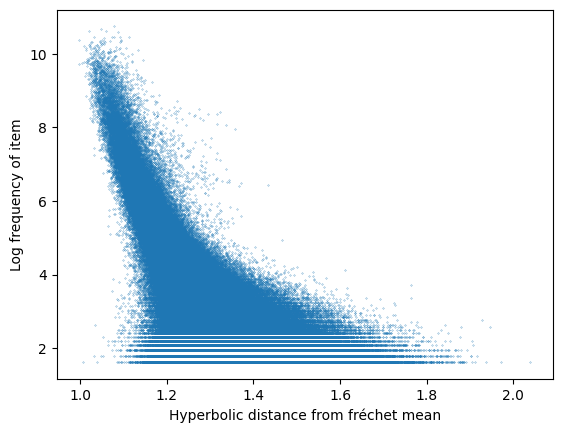

In [51]:
colors = np.log([freqs[id_] for id_ in song2ids.keys()])
plt.scatter(distances, colors, s=0.05)
plt.xlabel("Hyperbolic distance from fréchet mean")
plt.ylabel("Log frequency of item")

In [36]:
freqs = json.load(open("../data/frequencies.json"))

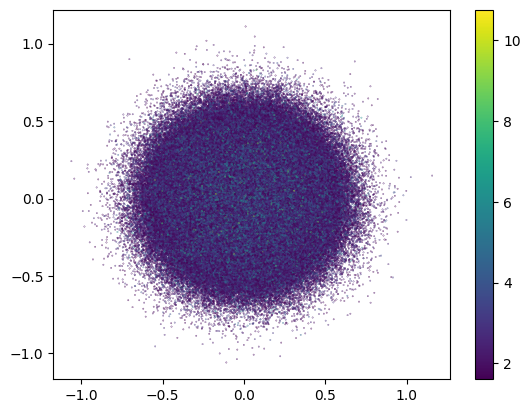

In [40]:
import matplotlib.pyplot as plt
colors = np.log([freqs[id_] for id_ in song2ids.keys()])
plt.scatter(projected[:, 0], projected[:, 1], c=colors, s=0.05)
plt.colorbar()